# Working Environment

We import all the packages you should need below. However, feel free to import extra packages. If you need to install some of these packages (ex: **rasterio**), you can access your shell and install like this: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

In [1]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.2MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# All the imports are here
import warnings
from os import listdir
from os.path import isfile, join

import numpy as np
import rasterio

from matplotlib import pyplot as plt
%matplotlib inline 

# Data Manipulation Challenge description & instructions

In this challenge, you will have to load and manipulate satellite images, a typical daily task at Kayrros. Data manipulation is one of the core skills one should master, even before thinking about fancy algorithms and data pipelines. 

You will not be required to have any specific knowledge on imagery, as we will provide you with the necessary guidelines.

Please keep your code clean and don't forget to comment your code. You are also encouraged to provide as much detail as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. We will evaluate the cleanliness of your code as much as your results.

Have fun!

# Data loading and data description

## Setup

In [4]:
# Define the path where the images are located
IMG_PATH = '/content/drive/MyDrive/data/'

# The functions below will be useful to load tif images as arrays
def rio_open(p):
    """
    Open an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        rasterio dataset
    """
    with warnings.catch_warnings():  # noisy warning may occur here
        warnings.filterwarnings("ignore", category=UserWarning)
        return rasterio.open(p)

def rio_read(p):
    """
    Read an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        numpy array
    """
    with rio_open(p) as x:
        return x.read().transpose((1, 2, 0)).squeeze()

## Loading and visualizing your first random satellite image band

Each satellite image is composed of 13 bands, going from visible light to near infrared. 

You will find these bands in the `data/` folder, under the format [image\_date]\_[image\_number].tif

The usual RGB images you are used to see (a picture for instance) are made of bands B02 (Blue), B03 (Green) and B04 (Red)

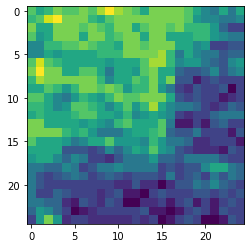

In [5]:
# Here, we show you how to load a given band from a random image and to visualize it
random_image_band = '/content/drive/MyDrive/data/20170106_B10.tif'
img = rio_read(random_image_band)
plt.imshow(img)

In [6]:
# We are getting all the image data from this code which was stored in Data File.
import os 
path_to_image_data = '/content/drive/MyDrive/data'
image_files = [pos_image_data for pos_image_data in os.listdir(path_to_image_data) if pos_image_data.endswith('.tif')]


## Loading the data set

In this section, you are expected to load the full data set in the following format: **dataset = {img\_date: {'B01': img\_B01_array, ..., 'B12': img\_B12_array}}**, where img\_B0X_array are the image bands as arrays, i.e. the output of the rio_read() function

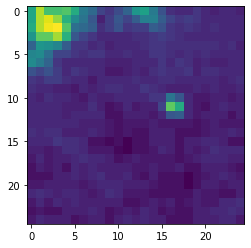

In [7]:
# Load the dataset under the required format
import json
dataset = {}
for i in image_files:
  data = '/content/drive/MyDrive/data/' + i
  names = os.path.splitext(i)[0].split('_')[1]
  date = os.path.splitext(i)[0].split('_')[0]
  # print(" Name ==> {} , Date ==> {} , Data ==> {}".format(names, date , data))
  # format dataset = {date : {name : data}}
  if date not in dataset.keys():
    # print("New Date  ====>  ",date)
    dataset.update({
        date : {names:rio_read(data)}
        })
  else:
    # print("Date Existed ===> ",date)
    if names not in dataset[date].keys():
      dataset[date].update({
          names: rio_read(data)
      })


# Sanity check: visualize the 3rd band of the image from 2018/05/31
# WRITE YOUR CODE HERE
#  B10 is the 3rd band of the dataset
plt.imshow(dataset['20180531']['B10'])

# Generating a RGB image 

Now we know how to visualize a given satellite image band, we are going to build a function that will allow us to visualize a given satellite image as an RGB image.

A RGB image can be represented as a 3D array, with the dimensions [channel, img_height, img_width] or [img_height, img_width, channel], with channels B02, B03 and B04.

In [8]:
# In order to test your function, you can use the following random image
# We want to display the image as an RGB composite, i.e. B04, B03, B02
img = np.array([dataset['20170630']['B04'], dataset['20170630']['B03'], dataset['20170630']['B02']])


(3, 150, 150)


array([[[0.24814903, 0.20921901, 0.22522092, ..., 0.51301648,
         0.48626702, 0.43014091],
        [0.22545976, 0.20969668, 0.25746358, ..., 0.51516599,
         0.49223788, 0.45020301],
        [0.1932171 , 0.22450442, 0.28230236, ..., 0.4888942 ,
         0.46644375, 0.4203487 ],
        ...,
        [0.36040124, 0.344877  , 0.34224982, ..., 0.41796035,
         0.47766898, 0.51206114],
        [0.38189635, 0.37043229, 0.37162646, ..., 0.37162646,
         0.43276809, 0.49223788],
        [0.36016241, 0.35657989, 0.36326726, ..., 0.37759733,
         0.40171961, 0.44518749]],

       [[0.16025794, 0.12897062, 0.12538811, ..., 0.33054693,
         0.31311201, 0.28206353],
        [0.15619775, 0.13661333, 0.1523764 , ..., 0.33006926,
         0.31430619, 0.28851206],
        [0.138524  , 0.13112013, 0.17267733, ..., 0.30976833,
         0.29400525, 0.26844996],
        ...,
        [0.206353  , 0.19488894, 0.20133747, ..., 0.27036064,
         0.30236446, 0.33293528],
        [0.2

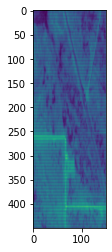

In [67]:
# Build your function that takes as input, a 3D array with B04, B03, B02 bands and returns the final rgb_img ready to be visualized

# WRITE YOUR CODE HERE by completing the function below

def generate_rgb_img(img):
    
    # 1. First, you need to normalize your image. Otherwise you won't be able to visualize it.
    # Normalise your image here
    normalized_image  = (img - np.min(img)) / (np.max(img) - np.min(img))
    print(normalized_image.shape)
    plt.imshow(normalized_image.transpose(2,0,1).reshape(-1,normalized_image.shape[1]))
    # 2. The function imshow() allows you to visualise an RGB image, but it needs to be under the format [img_height, img_width, channel_number]
    # It's currently under the format [channel_number, img_height, img_width], so transform the image into the correct format
    # plt.imshow(normalized_image.transpose(2, 1, 0))
    # Display the RGB image
    return normalized_image

# Sanity check: test your function
generate_rgb_img(img)
# WRITE YOUR CODE HERE



*   Since it was expected from the developer's side that I have to complete my task in 3 hours, I would like to bring to your notice that i  have succeeded in doing the Data preprocessing and Manuipulation part in that time till here.
*  I request to you to grant me a little more time to complete the visualization part.



# Detecting patterns in satellite imagery: flaring detection
In this section, we are going to detect some activity that might be difficult to observe in an RGB image by utilizing other satellite bands.

The activity we want to detect is called flaring: the process of burning gas in an open flame, which can be detected easily in the infrared spectrum picked up by the satellite.

(3, 150, 150)


array([[[0.24814903, 0.20921901, 0.22522092, ..., 0.51301648,
         0.48626702, 0.43014091],
        [0.22545976, 0.20969668, 0.25746358, ..., 0.51516599,
         0.49223788, 0.45020301],
        [0.1932171 , 0.22450442, 0.28230236, ..., 0.4888942 ,
         0.46644375, 0.4203487 ],
        ...,
        [0.36040124, 0.344877  , 0.34224982, ..., 0.41796035,
         0.47766898, 0.51206114],
        [0.38189635, 0.37043229, 0.37162646, ..., 0.37162646,
         0.43276809, 0.49223788],
        [0.36016241, 0.35657989, 0.36326726, ..., 0.37759733,
         0.40171961, 0.44518749]],

       [[0.16025794, 0.12897062, 0.12538811, ..., 0.33054693,
         0.31311201, 0.28206353],
        [0.15619775, 0.13661333, 0.1523764 , ..., 0.33006926,
         0.31430619, 0.28851206],
        [0.138524  , 0.13112013, 0.17267733, ..., 0.30976833,
         0.29400525, 0.26844996],
        ...,
        [0.206353  , 0.19488894, 0.20133747, ..., 0.27036064,
         0.30236446, 0.33293528],
        [0.2

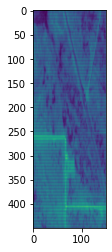

In [68]:
# Load and visualize the RGB image on 2018/05/31. Can you easily identify flaring ?

# WRITE YOUR CODE HERE
img = np.array([dataset['20180531']['B04'], dataset['20180531']['B03'], dataset['20180531']['B02']])
generate_rgb_img(img)

# plt.imshow(img)

# Yes , Flaring is visible somwhere around the co-ordinates(70,85)

(2, 75, 75)
[[0.18509758 0.18302779 0.18076089 ... 0.23901045 0.24275577 0.25221762]
 [0.07273802 0.06524739 0.07125961 ... 0.1579933  0.15966884 0.17336882]
 [0.20076878 0.206781   0.19889612 ... 0.23723635 0.24255864 0.24837374]
 ...
 [0.22215651 0.22018529 0.22284644 ... 0.18509758 0.16676523 0.16292135]
 [0.29410605 0.2967672  0.31086142 ... 0.28139168 0.28208161 0.26690321]
 [0.20362705 0.20776661 0.2242263  ... 0.18066233 0.18411197 0.16528681]]


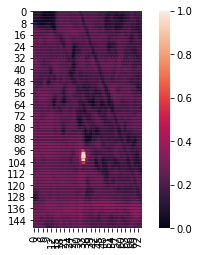

In [81]:
# You can generate a heatmap by simply adding B11 and B12, that is to say: heatmap = B11 + B12
# Below, generate a heatmap of the image and visualize it. You should see a clear signal on the center-right of the image
import seaborn as sns
img_2 = np.array([dataset['20180531']['B11'],dataset['20180531']['B12']])
data = generate_rgb_img(img_2)
img_n = data.transpose(2,0,1).reshape(-1,data.shape[1]) 
print(img_n)
sns.heatmap(img_n)



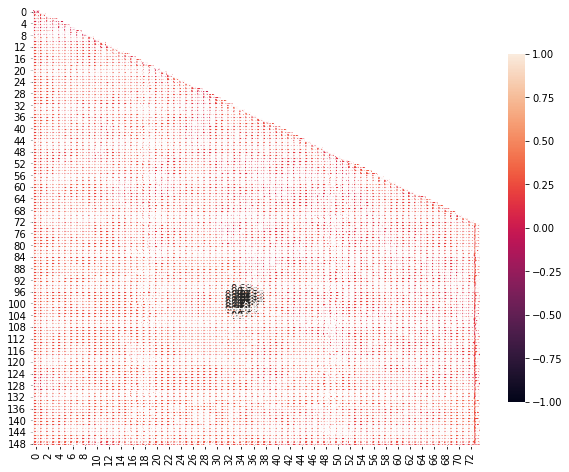

In [78]:
987# To help us automate the detection process, it is easier to produce a mask of the flaring activity
# We can consider that there is flaring activity on a pixel if the value of the pixel is above 15.000
# Generate a mask of the flaring activity in the previous heatmap (mask: pixel=1 where there is flaring, pixel=0 where there is no flaring)
# Visualize the resulting mask
import numpy.ma as ma
# Creatin a Mask for flaring activity
mask = ma.masked_greater(img_n,1)
sns.heatmap(img_n,mask=mask,annot=True)


In [14]:
# We consider an image to have flaring activity if the number of pixels above 15.000 in an image is >= 5.
# Write below a function that returns all the dates for which we should detect flaring activity in the data we provided
def flare_detection(image_data):
  """
    image_data : The data of a particular image.

    Returns :

          Dates of the images in which Flaring activity is detected above a suitable threshold.
  """
  flared_data = ma.masked_greater_equal(image_data, 15)
  
  # print(flared_data)

flare_detection(img_n)

Question: if you had 1,000 images to process, would you keep the same code structure? What would you change?

In [ ]:
# Answer the question here, no need to re-write any code
# May be ,  I will take a few thing sfrom the above code structure and build a pipeline for the smooth functioning of the image processing

# More fun on data manipulation: zooming in an image on the flaring activity detected

In [ ]:
# First, find the center of the flaring activity, that is to say, given all the images for which you detected that there was a flare, 
# combine them to find the center of the flaring activity in the image time series
# Your code should return the index of the pixel at the center of the flaring activity

# WRITE YOUR CODE HERE

In [ ]:
# Then, make a crop of band B02 using an image of your choice, centered on the pixel at the center of the flaring activity, with a size of 50 x 50 pixels
# If the crop is not entirely contained in the image, you can complete the missing pixels of the crop with the value 0
# Do not use any pre-built cropping functions from other libraries, only use umpy array manipulation.
# Visualize the crop

# WRITE YOUR CODE HERE

In [ ]:
# Finally, zoom (expand the size) of the previously obtained crop, i.e. produce an image of size 100x100 pixels from the crop of size 50x50
# Do not use any pre-built functions from other libraries
# For this, you will have to create "new" pixels, that you can either interpolate or duplicate from neighboring existing pixels
# Visualize the resulting image

# WRITE YOUR CODE HERE

CONGRATS ! You made it. We hope you had fun, please send back your solution in due time.